### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [40]:
data = pd.read_csv('coupons.csv')

In [41]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [42]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

# Data Cleaning
Since the 'car' column is almost entirely null values (12576 null values and only 108 non-null values), I decided it would be better to drop the column entirely. Since there are so few observations, the data will not result in meaninful observations. 

There are a few other columns with null values: 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50'. With these nulls, I chose not to get rid of the entire columns since there were so few nulls in comparison to the number of filled in values. With these, I chose to drop all the null rows.

In [43]:
data = data.drop('car', axis = 1)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [46]:
data.dropna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [253]:
total_observations = data['Y'].count()
accepts = data[data['Y'] == 1]['Y'].count()
rejects = data[data['Y'] == 0]['Y'].count()
ans4 = data['Y'].mean()
print(f"Accepts offer: {accepts}")
print(f"Rejects offer: {rejects}")
print(f"Total offers: {total_observations}")
print(f"Acceptance rate of total observations: {ans4 * 100 :.2f}%")

Accepts offer: 7210
Rejects offer: 5474
Total offers: 12684
Acceptance rate of total observations: 56.84%


5. Use a bar plot to visualize the `coupon` column.

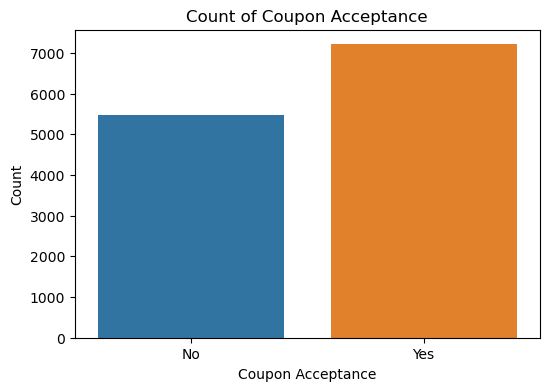

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x = 'Y')
plt.title('Count of Coupon Acceptance')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
ax=plt.gca()
ax.set_xticklabels(["No", "Yes"])
plt.show()

6. Use a histogram to visualize the temperature column.

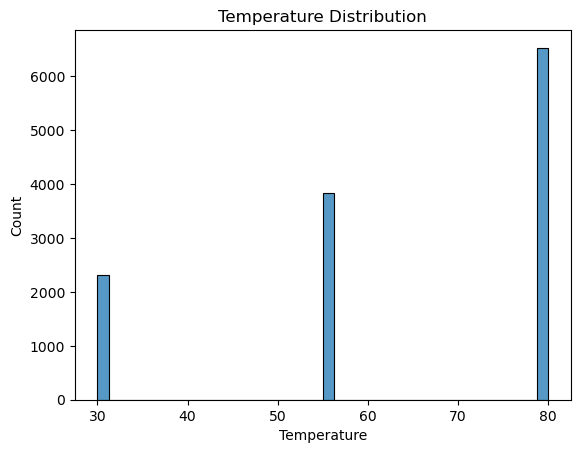

In [68]:
sns.histplot(data = data, x = 'temperature', bins = 40)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [95]:
dfbar = data[data['coupon'] == 'Bar']
dfbar.info()
dfbar.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null  

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [256]:
acc_bar = dfbar['Y'].mean()
print(f"acceptance rate for bar coupons: {acc_bar*100:.2f}%")


acceptance rate for bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [130]:
dfbar_filtered_a = dfbar[dfbar['Bar'].isin(['never', 'less1', '1~3'])]
group_counts_a = dfbar_filtered_a.shape[0] 
y_sum_a = dfbar_filtered_a['Y'].sum()
ans_3_or_fewer = (y_sum_a/group_counts_a)*100
print(f"acceptance rate for 3 or fewer times a month: {ans_3_or_fewer:.2f}%")

acceptance rate for 3 or fewer times a month: 37.06%


In [131]:
dfbar_filtered_b = dfbar[dfbar['Bar'].isin(['4~8', 'gt8'])]
group_counts_b = dfbar_filtered_b.shape[0] 
group_counts_b
y_sum_b = dfbar_filtered_b['Y'].sum()
ans_4_or_more = (y_sum_b/group_counts_b)*100
print(f"acceptance rate for 4 or more times a month: {ans_4_or_more:.2f}%")

acceptance rate for 4 or more times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [261]:
bars_more_than_1 = ['1~3','4~8', 'gt8'] 
over_age_25 = ['26', '31', '36', '41', '46', '50plus']
ans_4a = (dfbar.query("Bar in @bars_more_than_1 & age in @over_age_25")["Y"].mean())*100
print(f"acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {ans_4a:.2f}%")

acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52%


In [262]:
ans_4b = (dfbar.query("not(Bar in @more_than_1 & age in @over_age_25)")["Y"].mean())*100
print(f"acceptance rate for all others: {ans_4b:.2f}%")

acceptance rate for all others: 33.50%


Frequency of visits and age (over 25) do have an impact on bar visits. This makes sense because individuals under 21 cannot go into bars, so they are not likely to accept a bar coupon. It also makes sense that people who frequent bars are more likely to accept the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [263]:
kids = ['Kid(s)']
fff = ['Farming Fishing & Forestry']
ans_5 = (dfbar.query("Bar in @bars_more_than_1 & passanger not in @kids & occupation not in @fff")["Y"].mean())*100
print(f"acceptance rate for drivers who go to bars more than once a month and had passangers that were not a kid and had occupations other than farming, fishing, or forestry: {ans_5:.2f}%")

acceptance rate for drivers who go to bars more than once a month and had passangers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [265]:
widowed = ['Widowed']
below_age_30 = ['below21', '21', '26']
less_than_50k = ['Less than $12500', '$12500 — $24999','$25000 — $37499','$37500 — $49999']
more_than_4x = ['4~8', 'gt8']
ans_6a = (dfbar.query("Bar in @bars_more_than_1 & passanger not in @kids & maritalStatus not in @widowed")["Y"].mean())*100
ans_6b = (dfbar.query("Bar in @bars_more_than_1 & age in @below_age_30")["Y"].mean())*100
ans_6c = (dfbar.query("RestaurantLessThan20 in @more_than_4x & income in @less_than_50k")["Y"].mean())*100
print(f"acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {ans_6a:.2f}%")
print(f"acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {ans_6b:.2f}%")
print(f"acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {ans_6c:.2f}%")

acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.32%
acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72.17%
acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 43.84%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accept Bar coupons are above and below age 30 meaning that age does not really have an impact on whether or not someone accepts a bar coupon. Typically those who accept a coupon go to bars more than once a month, and having kids in the car decreases the likelihood that someone will accept a bar coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I am going to look at Coffee House coupons and try to determine which type of person will accept them or in what situations they will most likely be accepted. Below is my analysis and findings.

In [188]:
#create a new dataframe with only data on Coffee House coupons
dfcoffee = data[data['coupon'] == 'Coffee House']
dfcoffee.info()
dfcoffee.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null  

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


Question 1: What proportion of the coffee house observations chose to accept the coupon?

In [267]:
coffee_house_obs = dfcoffee['Y'].count()
accepts = dfcoffee[dfcoffee['Y'] == 1]['Y'].count()
rejects = dfcoffee[dfcoffee['Y'] == 0]['Y'].count()
acc_rate_coffee = dfcoffee['Y'].mean()
print(f"Accepts offer: {accepts}")
print(f"Rejects offer: {rejects}")
print(f"Coffee House offers: {coffee_house_obs}")
print(f"Acceptance rate of Coffee House observations: {acc_rate_coffee * 100 :.2f}%")

Accepts offer: 1995
Rejects offer: 2001
Coffee House offers: 3996
Acceptance rate of Coffee House observations: 49.92%


Answer 1: 49.92%

Question 2: How many Coffee House coupons were offered with a 1 day expiration vs a 2 hour expiration and what were the acceptance rates for each type?

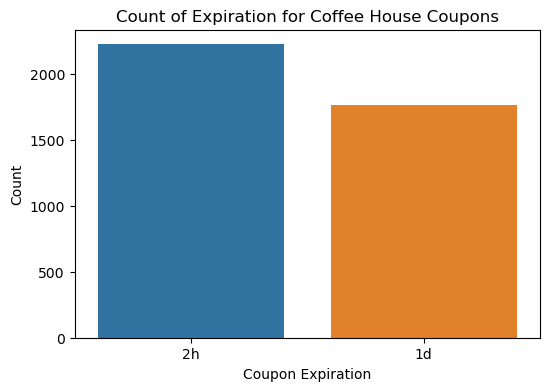

count for drivers who are offered coffee house coupons that expire in 2 hours: 2227
count for drivers who are offered coffee house coupons that expire in 1 day: 1769


In [280]:
plt.figure(figsize=(6,4))
sns.countplot(data=dfcoffee, x = 'expiration')
plt.title('Count of Expiration for Coffee House Coupons')
plt.xlabel('Coupon Expiration')
plt.ylabel('Count')
plt.show()
twohour_count = dfcoffee[dfcoffee['expiration'] == '2h']['expiration'].count()
oneday_count =  dfcoffee[dfcoffee['expiration'] == '1d']['expiration'].count()
print (f"count for drivers who are offered coffee house coupons that expire in 2 hours: {twohour_count}")
print (f"count for drivers who are offered coffee house coupons that expire in 1 day: {oneday_count}")

In [281]:
ans_coffee_2h = (dfcoffee.query("expiration == '2h'")["Y"].mean())*100
ans_coffee_1d = (dfcoffee.query("expiration == '1d'")["Y"].mean())*100
print(f"acceptance rate for drivers who are offered coffee house coupons that expire in 2 hours: {ans_coffee_2h:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons that expire in 1 day: {ans_coffee_1d:.2f}%")

acceptance rate for drivers who are offered coffee house coupons that expire in 2 hours: 43.20%
acceptance rate for drivers who are offered coffee house coupons that expire in 1 day: 58.39%


Answer 2: 2 hour expiration coupon count: 2227
1 day expiration coupon count: 1769
acceptance rate for 2 hour coupons: 43.20%
acceptance rate for 1 day coupons: 58.39%
Clearly coupons with an expiration time of 1 day are much more likely to be accepted than coupons with an expiration time of 2 hours

Question 3: How many Coffee House coupons were offered when it was sunny, rainy, and snowy and what were the acceptance rates for coupons for cofee houses given during each type of weather?

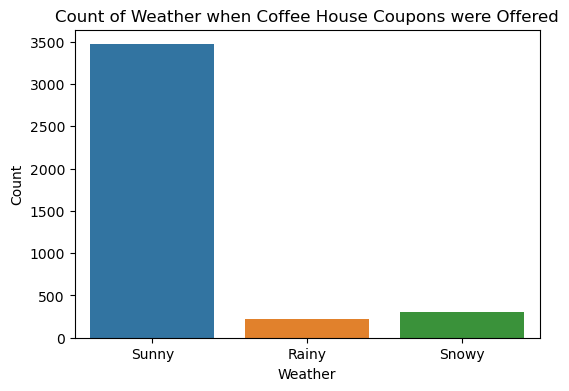

count for drivers who are offered coffee house coupons when it is sunny: 3467
count for drivers who are offered coffee house coupons when it is rainy: 226
count for drivers who are offered coffee house coupons when it is snowy: 303


In [282]:
fig = plt.figure(figsize=(6,4))
sns.countplot(data=dfcoffee, x = 'weather')
plt.title('Count of Weather when Coffee House Coupons were Offered')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()
sunny_count = dfcoffee[dfcoffee['weather'] == 'Sunny']['weather'].count()
rainy_count =  dfcoffee[dfcoffee['weather'] == 'Rainy']['weather'].count()
snowy_count =  dfcoffee[dfcoffee['weather'] == 'Snowy']['weather'].count()
print (f"count for drivers who are offered coffee house coupons when it is sunny: {sunny_count}")
print (f"count for drivers who are offered coffee house coupons when it is rainy: {rainy_count}")
print (f"count for drivers who are offered coffee house coupons when it is snowy: {snowy_count}")

In [272]:
coffee_sunny = (dfcoffee.query("weather == 'Sunny'")["Y"].mean())*100
coffee_rainy = (dfcoffee.query("weather == 'Rainy'")["Y"].mean())*100
coffee_snowy = (dfcoffee.query("weather == 'Snowy'")["Y"].mean())*100
print(f"acceptance rate for drivers who are offered coffee house coupons when it is sunny: {coffee_sunny:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when it is rainy: {coffee_rainy:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when it is snowy: {coffee_snowy:.2f}%")

acceptance rate for drivers who are offered coffee house coupons when it is sunny: 50.36%
acceptance rate for drivers who are offered coffee house coupons when it is rainy: 52.21%
acceptance rate for drivers who are offered coffee house coupons when it is snowy: 43.23%


Answer 3: coupons offered when it is sunny count: 3467
coupons offered when it is rainy: 226
coupons offered when it is snowy: 303
acceptance rate when it is sunny: 50.36%
acceptance rate when it is rainy: 52.21%
acceptance rate when it is snowy: 43.23%
When the it is snowing, the coupon acceptance is lower than when it is sunny or rainy. Sunny and rainy weather results in similar coupon acceptance. There is significantly more data for sunny days however. 

Question 4: How many Coffee House coupons were offered when the driver was alone, with friend(s), with kid(s), or with a partner and what were the acceptance rates for coupons for cofee houses given with each type of passenger?

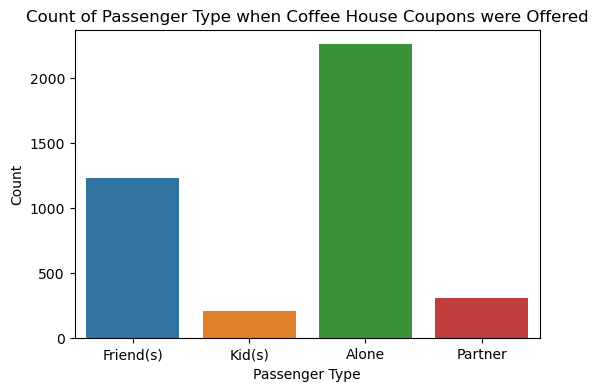

count for drivers who are offered coffee house coupons when their passenger is a friend: 1228
count for drivers who are offered coffee house coupons their passenger is a kid: 207
count for drivers who are offered coffee house coupons when they are alone: 2256
count for drivers who are offered coffee house coupons their passenger is a partner: 305


In [284]:
fig = plt.figure(figsize=(6,4))
sns.countplot(data=dfcoffee, x = 'passanger')
plt.title('Count of Passenger Type when Coffee House Coupons were Offered')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.show()
friends_count = dfcoffee[dfcoffee['passanger'] == 'Friend(s)']['passanger'].count()
kids_count =  dfcoffee[dfcoffee['passanger'] == 'Kid(s)']['passanger'].count()
alone_count =  dfcoffee[dfcoffee['passanger'] == 'Alone']['passanger'].count()
partner_count =  dfcoffee[dfcoffee['passanger'] == 'Partner']['passanger'].count()
print (f"count for drivers who are offered coffee house coupons when their passenger is a friend: {friends_count}")
print (f"count for drivers who are offered coffee house coupons their passenger is a kid: {kids_count}")
print (f"count for drivers who are offered coffee house coupons when they are alone: {alone_count}")
print (f"count for drivers who are offered coffee house coupons their passenger is a partner: {partner_count}")

In [285]:
coffee_friends = (dfcoffee.query("passanger == 'Friend(s)'")["Y"].mean())*100
coffee_kids = (dfcoffee.query("passanger == 'Kid(s)'")["Y"].mean())*100
coffee_alone = (dfcoffee.query("passanger == 'Alone'")["Y"].mean())*100
coffee_partner = (dfcoffee.query("passanger == 'Partner'")["Y"].mean())*100
print(f"acceptance rate for drivers who are offered coffee house coupons when they are with friend(s): {coffee_friends:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when they are with kid(s): {coffee_kids:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when they are alone: {coffee_alone:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when they are with their partner: {coffee_partner:.2f}%")

acceptance rate for drivers who are offered coffee house coupons when they are with friend(s): 59.69%
acceptance rate for drivers who are offered coffee house coupons when they are with kid(s): 48.31%
acceptance rate for drivers who are offered coffee house coupons when they are alone: 43.79%
acceptance rate for drivers who are offered coffee house coupons when they are with their partner: 57.05%


Answer 4: 
Coupons offered when driving a friend: 1228
coupons offered when driving a kid: 207
coupons offered when driving alone: 2256
coupons offered when driving a partner: 305
acceptance rate when driving a friend: 59.69%
acceptance rate when driving a kid: 48.31%
acceptance rate when driving alone: 43.79%
acceptance rate when driving a partner: 57.05%
Most of the coupons were offered when driving alone and the second most were offered when driving a friend. Acceptance rate was highest when driving a friend but lowest when driving alone.

Question 5: How many Coffee House coupons were offered when the driver was going in the same or opposite direction of the coffee house and what were the acceptance rates for coupons given when going the same or opposite directions?

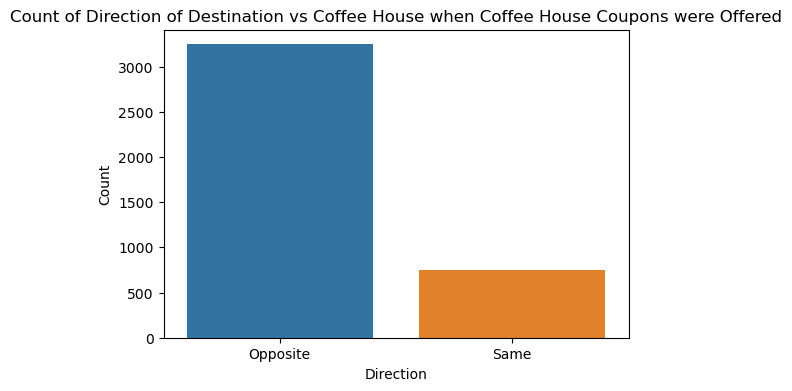

count for drivers who are offered coffee house coupons when they are going in the opposite direction: 3246
count for drivers who are offered coffee house coupons when they are going in the same direction: 750


In [288]:
fig = plt.figure(figsize=(6,4))
sns.countplot(data=dfcoffee, x = 'direction_same')
plt.title('Count of Direction of Destination vs Coffee House when Coffee House Coupons were Offered')
plt.xlabel('Direction')
plt.ylabel('Count')
ax=plt.gca()
ax.set_xticklabels(["Opposite", "Same"])
plt.show()
opposite_count = dfcoffee[dfcoffee['direction_same'] == 0]['direction_same'].count()
same_count =  dfcoffee[dfcoffee['direction_same'] == 1]['direction_same'].count()
print (f"count for drivers who are offered coffee house coupons when they are going in the opposite direction: {opposite_count}")
print (f"count for drivers who are offered coffee house coupons when they are going in the same direction: {same_count}")

In [289]:
coffee_opposite = (dfcoffee.query("direction_same == 0")["Y"].mean())*100
coffee_same = (dfcoffee.query("direction_same == 1")["Y"].mean())*100
print(f"acceptance rate for drivers who are offered coffee house coupons when they are going in the opposite direction: {coffee_opposite:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons when they are going in the same direction: {coffee_same:.2f}%")

acceptance rate for drivers who are offered coffee house coupons when they are going in the opposite direction: 49.20%
acceptance rate for drivers who are offered coffee house coupons when they are going in the same direction: 53.07%


Answer 5: 
Coupons offered when driving in the opposite direction: 3246
coupons offered when driving in the same direction: 750
acceptance rate when driving in the opposite direction: 49.20%
acceptance rate when driving in the same direction: 53.07%
While the majority of the coupons were offered when drivers were going in the opposite direction of the coffee house, direction of destination vs coffee house did not have a meaningful impact on the acceptance rate.

Question 6: How many Coffee House coupons were offered at each time of day and what were the acceptance rates for coupons at each time?

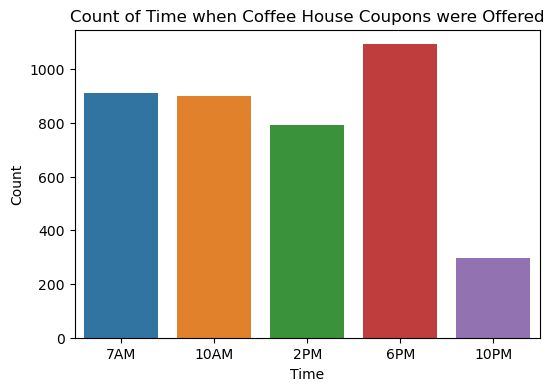

count for drivers who are offered coffee house coupons at 7am: 913
count for drivers who are offered coffee house coupons at 10am: 899
count for drivers who are offered coffee house coupons at 2pm: 794
count for drivers who are offered coffee house coupons at 6pm: 1093
count for drivers who are offered coffee house coupons at 10pm: 297


In [296]:
fig = plt.figure(figsize=(6,4))
order = ['7AM', '10AM', '2PM', '6PM', '10PM']
sns.countplot(data=dfcoffee, x = 'time', order = order)
plt.title('Count of Time when Coffee House Coupons were Offered')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()
sevenam_count = dfcoffee[dfcoffee['time'] == '7AM']['time'].count()
tenam_count = dfcoffee[dfcoffee['time'] == '10AM']['time'].count()
twopm_count = dfcoffee[dfcoffee['time'] == '2PM']['time'].count()
sixpm_count = dfcoffee[dfcoffee['time'] == '6PM']['time'].count()
tenpm_count = dfcoffee[dfcoffee['time'] == '10PM']['time'].count()
print (f"count for drivers who are offered coffee house coupons at 7am: {sevenam_count}")
print (f"count for drivers who are offered coffee house coupons at 10am: {tenam_count}")
print (f"count for drivers who are offered coffee house coupons at 2pm: {twopm_count}")
print (f"count for drivers who are offered coffee house coupons at 6pm: {sixpm_count}")
print (f"count for drivers who are offered coffee house coupons at 10pm: {tenpm_count}")

In [297]:
coffee_7am = (dfcoffee.query("time == '7AM'")["Y"].mean())*100
coffee_10am = (dfcoffee.query("time == '10AM'")["Y"].mean())*100
coffee_2pm = (dfcoffee.query("time == '2PM'")["Y"].mean())*100
coffee_6pm = (dfcoffee.query("time == '6PM'")["Y"].mean())*100
coffee_10pm = (dfcoffee.query("time == '10PM'")["Y"].mean())*100
print(f"acceptance rate for drivers who are offered coffee house coupons at 7am: {coffee_7am:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons at 10am: {coffee_10am:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons at 2pm: {coffee_2pm:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons at 6pm: {coffee_6pm:.2f}%")
print(f"acceptance rate for drivers who are offered coffee house coupons at 10pm: {coffee_10pm:.2f}%")

acceptance rate for drivers who are offered coffee house coupons at 7am: 44.58%
acceptance rate for drivers who are offered coffee house coupons at 10am: 64.07%
acceptance rate for drivers who are offered coffee house coupons at 2pm: 54.79%
acceptance rate for drivers who are offered coffee house coupons at 6pm: 41.26%
acceptance rate for drivers who are offered coffee house coupons at 10pm: 42.42%


Answer 6: 
count at 7am: 913,
count at 10am: 899,
count at 2pm: 794,
count at 6pm: 1093,
count at 10pm: 297,
acceptance rate at 7am: 44.58%,
acceptance rate at 10am: 64.07%,
acceptance rate at 2pm: 54.79%,
acceptance rate at 6pm: 41.26%,
acceptance rate at 10pm: 42.42%,
6pm is the most popular time to offer coupons, but the acceptance rate is highest at 10am followed by 2pm. The acceptance rates at 7am, 6pm, and 10pm are pretty similar, which is suprising since most people think of drinking coffee in the early morning.

# Next Steps and Recommendations
Frequency:
From the bar coupon data, it is clear that there is a strong correlation between how often someone frequents a type of establishment and whether or not they accept the coupon. I strongly recommend collecting that data for each type of coupon.

Time of Send:
Coupons sent mid-day are much more likely to be accepted for Coffe House coupons. 10am and 2pm have higher acceptance rates than all other times. It would be interesting to look at this for each type of coupons. For example, bar coupons may be more likely to be accepted in the afternoon/evening (especially if they are only valid for 2 hours).

Direction of Destination vs Coupon Redemption Location:
Whether or not someone is heading in the same direction as the location where they can redeem their coupon does not seem to have an impact on whether or not the coupon will be accepted. Perhaps looking at what their destination is (i.e., work vs home) may have an impact on whether or not they can veer off their path. Also, if it's a 1 day coupon, they may be more likely to accept it if it is not in the same direction they are going because they can go redeem the coupon after their workday or doing what they need to at home.

Weather:
I believe that more data needs to be collected for rainy and snowy conditions. Currently that vast majority of the data for Coffee House coupons is from when coupons were sent out during sunny weather. This may have to do with the location or time of year polled, but I think further investigation should be done.